In [7]:
%pip install pyarrow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 17.3 MB/s  0:00:02 eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

base_path = "/Users/young/Downloads/MDS/M3/542 data wrangling/data/"

pr_level = pd.read_csv("/Users/young/Downloads/MDS/M3/542 data wrangling/data/pr_with_human_interaction_levels.csv")

pr_task_type      = pd.read_parquet(base_path + "pr_task_type.parquet")
pr_commits        = pd.read_parquet(base_path + "pr_commits.parquet")
pr_commit_details = pd.read_parquet(base_path + "pr_commit_details.parquet")


In [3]:

pr_task_type.head()



,agent,id,title,reason,type,confidence
0,Claude_Code,3264933329,Fix: Wait for all partitions in load_collectio...,title provides conventional commit label,fix,10
1,Claude_Code,3265709660,feat: add comprehensive README screenshots wit...,title provides conventional commit label,feat,10
2,Claude_Code,3265782173,chore: remove HashedPostStateProvider trait,title provides conventional commit label,chore,10
3,Claude_Code,3231949586,feat(swagger): Add Swagger annotations to Batc...,title provides conventional commit label,feat,10
4,Claude_Code,3231950376,feat(swagger): Add Swagger annotations to Batc...,title provides conventional commit label,feat,10


In [4]:

pr_commits.head()


,sha,pr_id,author,committer,message
0,15a543882cbad0c9348640cffdd71fb71ac34953,3205734508,rubys,rubys,refactor: Convert Build.Compose from string to...
1,cdd9bab35891037692f1d201db37d34d48342332,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility issues in shell exec...
2,219323e2aa1dacd76a422ad24cabf6976c9a6ac0,3107321792,haasonsaas,haasonsaas,Add Windows path validation fixes and comprehe...
3,58c52841e96e9fdcb70befadf7b3994519834861,3107321792,haasonsaas,haasonsaas,Address CodeRabbit review feedback - fix criti...
4,b04470fe6bae5e6802f1fe83e7c5f0b9273e74a3,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility tests - address patt...


In [5]:

pr_commit_details.head()

,sha,pr_id,author,committer,message,commit_stats_total,commit_stats_additions,commit_stats_deletions,filename,status,additions,deletions,changes,patch
0,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,.github/workflows/compile-llms-txt.yml,added,38.0,0.0,38.0,"@@ -0,0 +1,38 @@\n+name: Compile llms.txt\n+\n..."
1,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,docs/compile_llms_txt.py,added,47.0,0.0,47.0,"@@ -0,0 +1,47 @@\n+import os\n+from pathlib im..."
2,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,llms.txt,added,22923.0,0.0,22923.0,None
3,dbd1b5f129f7cffa5ce284d7255814c98bcc38a2,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Fix lint issues: remove unused variable and ap...,35,18,17,docs/compile_llms_txt.py,modified,18.0,17.0,35.0,"@@ -1,47 +1,48 @@\n import os\n from pathlib i..."
4,c2659cfdedf666c8f14753d71664563c2a932b23,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Update llms.txt to follow official standard wi...,23035,89,22946,docs/compile_llms_txt.py,modified,51.0,36.0,87.0,"@@ -3,45 +3,60 @@\n \n \n def compile_llms_txt..."


In [ ]:
pr_size_commits = (
    pr_commits
    .groupby("pr_id", as_index=False)
    .agg(n_commits=("sha", "nunique"))
)

pr_size_files_lines = (
    pr_commit_details
    .groupby("pr_id", as_index=False)
    .agg(
        n_files       = ("filename", "nunique"),
        lines_added   = ("additions", "sum"),
        lines_deleted = ("deletions", "sum"),
        lines_changed = ("changes", "sum")
    )
)

pr_size = pr_size_commits.merge(pr_size_files_lines, on="pr_id", how="outer")
pr_size.head()


,pr_id,n_commits,n_files,lines_added,lines_deleted,lines_changed
0,2756921963,16,15,848.0,344.0,1192.0
1,2757103560,10,16,517.0,262.0,779.0
2,2757124156,1,1,1.0,1.0,2.0
3,2757125491,1,1,1.0,1.0,2.0
4,2757179026,6,15,1633.0,169.0,1802.0


In [ ]:
pr_type = (
    pr_task_type[["id", "type", "title"]]
    .rename(columns={
        "id": "pr_id",        
        "type": "task_type"   
    })
    .drop_duplicates(subset=["pr_id"])   
)

pr_type.head()


,pr_id,task_type,title
0,3264933329,fix,Fix: Wait for all partitions in load_collectio...
1,3265709660,feat,feat: add comprehensive README screenshots wit...
2,3265782173,chore,chore: remove HashedPostStateProvider trait
3,3231949586,feat,feat(swagger): Add Swagger annotations to Batc...
4,3231950376,feat,feat(swagger): Add Swagger annotations to Batc...


In [ ]:


pr_rq2 = (
    pr_level
    .merge(pr_type, on="pr_id", how="left")   
    .merge(pr_size, on="pr_id", how="left")   
)

pr_rq2.head()


,pr_id,level,task_type,title,n_commits,n_files,lines_added,lines_deleted,lines_changed
0,3205734508,2.0,feat,Convert Build.Compose from string to struct wi...,1.0,6.0,136.0,6.0,142.0
1,3107321792,2.0,fix,Fix comprehensive Windows compatibility issues...,10.0,14.0,1395.0,680.0,2075.0
2,3234660269,2.0,fix,"Fix T-SQL parsing issues: OPENJSON, FOR JSON/X...",30.0,48.0,7708.0,3094.0,10802.0
3,3241611660,2.0,build,Update typos pre-commit hook configuration,1.0,1.0,2.0,4.0,6.0
4,3275448809,2.0,feat,Add DAE support for GPU kernels with mass matr...,1.0,11.0,184.0,24.0,208.0


In [ ]:
type_counts = (
    pr_rq2
    .groupby(["level", "task_type"])
    .size()
    .reset_index(name="n_prs")
)

type_counts["prop"] = (
    type_counts
    .groupby("level")["n_prs"]
    .transform(lambda x: x / x.sum())
)

type_counts.sort_values(["level", "n_prs"], ascending=[True, False]).head(20)


,level,task_type,n_prs,prop
4,0.0,feat,1135,0.354134
5,0.0,fix,1046,0.326365
3,0.0,docs,345,0.107644
8,0.0,refactor,220,0.068643
1,0.0,chore,173,0.053978
11,0.0,test,95,0.029641
0,0.0,build,72,0.022465
7,0.0,perf,49,0.015289
2,0.0,ci,37,0.011544
10,0.0,style,18,0.005616


In [10]:
size_summary = (
    pr_rq2
    .groupby("level")
    .agg(
        median_files   = ("n_files", "median"),
        median_lines   = ("lines_changed", "median"),
        median_commits = ("n_commits", "median"),
        p25_lines      = ("lines_changed", lambda x: x.quantile(0.25)),
        p75_lines      = ("lines_changed", lambda x: x.quantile(0.75)),
    )
)

size_summary


,median_files,median_lines,median_commits,p25_lines,p75_lines
level,,,,,
0.0,2.0,64.0,2.0,8.0,293.25
1.0,3.0,116.0,3.0,25.0,398.00
2.0,3.0,96.0,1.0,28.0,352.00


In [ ]:
for lv in sorted(type_counts["level"].unique()):
    print(f"\n=== Level {lv} ===")
    display(
        type_counts
        .loc[type_counts["level"] == lv]
        .sort_values("n_prs", ascending=False)
        .head(10)
    )



=== Level 0.0 ===


,level,task_type,n_prs,prop
4,0.0,feat,1135,0.354134
5,0.0,fix,1046,0.326365
3,0.0,docs,345,0.107644
8,0.0,refactor,220,0.068643
1,0.0,chore,173,0.053978
11,0.0,test,95,0.029641
0,0.0,build,72,0.022465
7,0.0,perf,49,0.015289
2,0.0,ci,37,0.011544
10,0.0,style,18,0.005616



=== Level 1.0 ===


,level,task_type,n_prs,prop
17,1.0,fix,1381,0.386402
16,1.0,feat,1083,0.303022
15,1.0,docs,419,0.117236
20,1.0,refactor,265,0.074147
13,1.0,chore,141,0.039452
23,1.0,test,106,0.029659
12,1.0,build,67,0.018747
14,1.0,ci,57,0.015949
19,1.0,perf,30,0.008394
22,1.0,style,16,0.004477



=== Level 2.0 ===


,level,task_type,n_prs,prop
28,2.0,feat,12232,0.456129
29,2.0,fix,5679,0.211769
27,2.0,docs,3123,0.116456
35,2.0,test,2155,0.080359
32,2.0,refactor,1803,0.067233
25,2.0,chore,582,0.021703
24,2.0,build,488,0.018197
26,2.0,ci,317,0.011821
31,2.0,perf,261,0.009733
34,2.0,style,154,0.005743


/var/folders/k2/sngvkdcn2ydby0tvb60zn_p00000gn/T/ipykernel_71369/2704145442.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=levels)


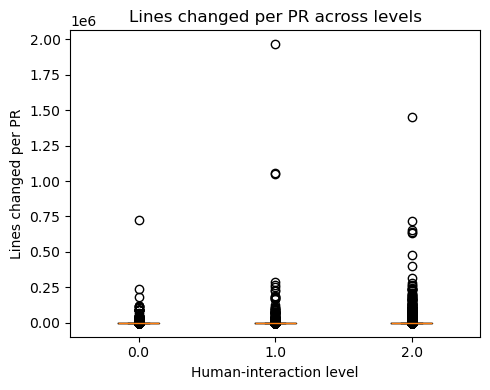

/var/folders/k2/sngvkdcn2ydby0tvb60zn_p00000gn/T/ipykernel_71369/2704145442.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=levels)


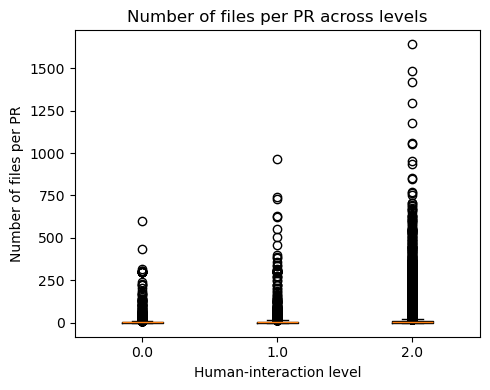

/var/folders/k2/sngvkdcn2ydby0tvb60zn_p00000gn/T/ipykernel_71369/2704145442.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=levels)


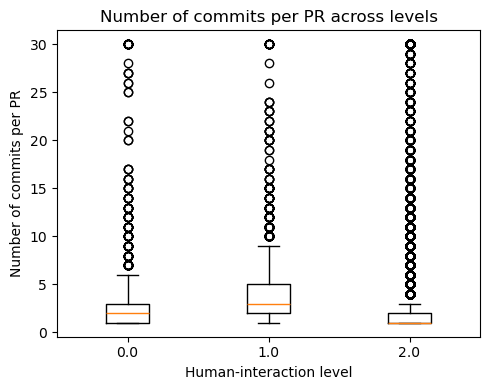

In [ ]:
import matplotlib.pyplot as plt

plot_dir = "/Users/young/Downloads/MDS/M3/542 data wrangling/plots"

levels = sorted(pr_rq2["level"].dropna().unique())

vars_to_plot = [
    ("lines_changed", "Lines changed per PR", "rq2_lines_changed_box.png"),
    ("n_files",       "Number of files per PR", "rq2_n_files_box.png"),
    ("n_commits",     "Number of commits per PR", "rq2_n_commits_box.png"),
]

for col, ylabel, fname in vars_to_plot:
    data = [
        pr_rq2.loc[pr_rq2["level"] == lv, col].dropna().values
        for lv in levels
    ]
    
    plt.figure(figsize=(5, 4))
    plt.boxplot(data, labels=levels)
    plt.xlabel("Human-interaction level")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} across levels")
    plt.tight_layout()
    
    plt.savefig(f"{plot_dir}/{fname}", dpi=300, bbox_inches="tight")
    plt.show()


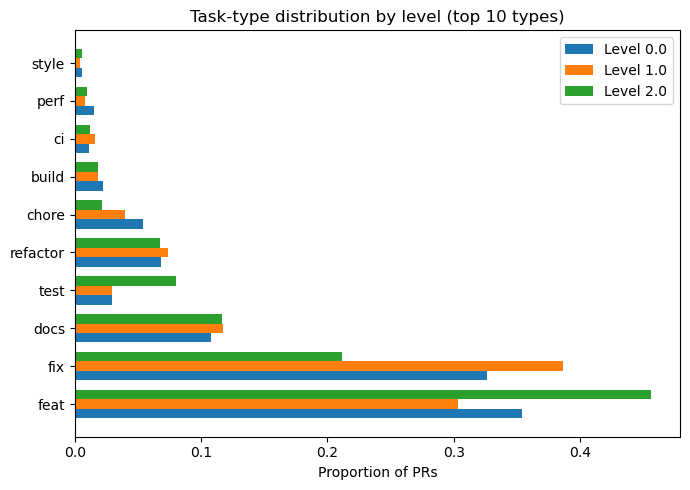

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

type_pivot = (
    type_counts
    .pivot(index="task_type", columns="level", values="prop")
    .fillna(0)
)

top_n = 10
top_types = (
    type_counts
    .groupby("task_type")["n_prs"].sum()
    .sort_values(ascending=False)
    .head(top_n)
    .index
)
type_pivot_top = type_pivot.loc[top_types]

task_types = type_pivot_top.index
y = np.arange(len(task_types))
bar_height = 0.25

plt.figure(figsize=(7, 5))

for i, lv in enumerate(sorted(type_pivot_top.columns)):
    plt.barh(
        y + (i - 1) * bar_height,
        type_pivot_top[lv].values,
        height=bar_height,
        label=f"Level {lv}"
    )

plt.yticks(y, task_types)
plt.xlabel("Proportion of PRs")
plt.title("Task-type distribution by level (top 10 types)")
plt.legend()
plt.tight_layout()

plt.savefig(f"{plot_dir}/rq2_task_type_hbar.png", dpi=300, bbox_inches="tight")
plt.show()


In [16]:
pr_rq2.to_csv("pr_rq2.csv", index=False)

In [17]:
import os
size_mb = os.path.getsize("pr_rq2.csv") / (1024 * 1024)
print(size_mb, "MB")

2.824427604675293 MB
